In [ ]:
import torch
from torchvision import datasets, transforms

In [ ]:
train_data = datasets.MNIST(root='./data', train=True, download=True,
                            transform=transforms.ToTensor())

In [ ]:
test_data = datasets.MNIST(root='./data', train=False, download=True,
                           transform=transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

In [ ]:
test_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=False)

In [ ]:
import torch.nn as nn
input_size = 28 * 28
hidden_size = 256
num_class = 10

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_class)
)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 99 == 0:
            print(epoch, i, running_loss)
            running_loss = 0.0

0 0 2.2908952236175537
0 99 219.30452132225037
0 198 196.44427180290222
0 297 165.9990290403366
0 396 133.48658525943756
0 495 108.43820798397064
0 594 90.54401159286499
0 693 78.56863629817963
0 792 70.5207309126854
0 891 63.27057757973671
1 0 0.6404710412025452
1 99 58.11804497241974
1 198 54.011751145124435
1 297 52.19235834479332
1 396 49.29592615365982
1 495 47.96864324808121
1 594 45.55697898566723
1 693 43.15508499741554
1 792 44.39494875073433
1 891 42.795584946870804


In [ ]:
testiter = iter(test_loader)

In [ ]:
images, labels = next(testiter)

In [ ]:
import torchvision
import matplotlib.pyplot as plt

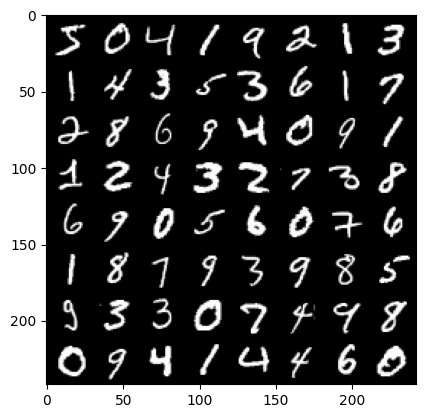

In [ ]:
plt.imshow(torchvision.utils.make_grid(images).permute(1,2, 0))

In [ ]:
result = model(images)

In [ ]:
torch.max(result, 1)

torch.return_types.max(
values=tensor([ 3.7196,  9.5204,  3.4176,  5.2619,  5.7347,  3.9413,  5.4187,  7.0681,
         4.7981,  5.7506,  7.1004,  1.8357,  9.2941,  6.4932,  5.1002,  7.3261,
         4.9862,  4.2628,  3.1481,  2.6210,  7.0139,  8.9698,  2.6361,  5.0744,
         1.4580,  7.0510,  3.3031, 11.3494,  6.5652,  1.8442,  3.2257,  4.7132,
         5.9727,  5.1930,  4.7820,  2.6373,  6.8761,  8.4441,  4.3963,  6.3417,
         6.0639,  4.8327,  4.6066,  3.6298,  3.8443,  6.6585,  4.1193,  5.3194,
         2.9690,  8.1372,  5.4671, 10.3329,  8.9423,  1.9135,  4.7704,  4.9139,
        10.4082,  4.9418,  7.4309,  5.3882,  3.7106,  3.8080,  6.0458,  8.0076],
       grad_fn=<MaxBackward0>),
indices=tensor([3, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 8, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        2, 2, 4, 3, 7, 7, 3, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        5, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0]))

In [ ]:
total = 0
count = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += images.size(0)
        count += (labels == predicted).sum().item()


In [ ]:
count / total

0.8887166666666667

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
model = pipeline(model='google/mobilenet_v2_1.0_224')

In [ ]:
!wget -c https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg


--2023-05-02 05:51:34--  https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg
Resolving huggingface.co (huggingface.co)... 13.35.166.109, 13.35.166.49, 13.35.166.62, ...
Connecting to huggingface.co (huggingface.co)|13.35.166.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56308 (55K) [image/jpeg]
Saving to: ‘pipeline-cat-chonk.jpeg’

pipeline-cat-chonk. 100%[===================>]  54.99K  --.-KB/s    in 0.003s  

2023-05-02 05:51:34 (17.0 MB/s) - ‘pipeline-cat-chonk.jpeg’ saved [56308/56308]



In [ ]:
from PIL import Image
Image.open('pipeline-cat-chonk.jpeg')

In [ ]:
model('pipeline-cat-chonk.jpeg')

[{'score': 0.6205989718437195, 'label': 'lynx, catamount'},
 {'score': 0.03102715127170086,
  'label': 'fox squirrel, eastern fox squirrel, Sciurus niger'},
 {'score': 0.018052425235509872, 'label': 'tiger cat'},
 {'score': 0.015168323181569576, 'label': 'tabby, tabby cat'},
 {'score': 0.013901294209063053,
  'label': 'wood rabbit, cottontail, cottontail rabbit'}]

In [ ]:
!pip install timm

In [ ]:
from transformers import pipeline
model = pipeline(model='facebook/detr-resnet-50')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [ ]:
!wget -c https://github.com/euphoris/datasets/raw/master/cv2023.zip
!unzip -q cv2023.zip

--2023-05-02 05:59:09--  https://github.com/euphoris/datasets/raw/master/cv2023.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/euphoris/datasets/master/cv2023.zip [following]
--2023-05-02 05:59:10--  https://raw.githubusercontent.com/euphoris/datasets/master/cv2023.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2514898 (2.4M) [application/zip]
Saving to: ‘cv2023.zip’

cv2023.zip          100%[===================>]   2.40M  --.-KB/s    in 0.1s    

2023-05-02 05:59:11 (16.1 MB/s) - ‘cv2023.zip’ saved [2514898/2514898]



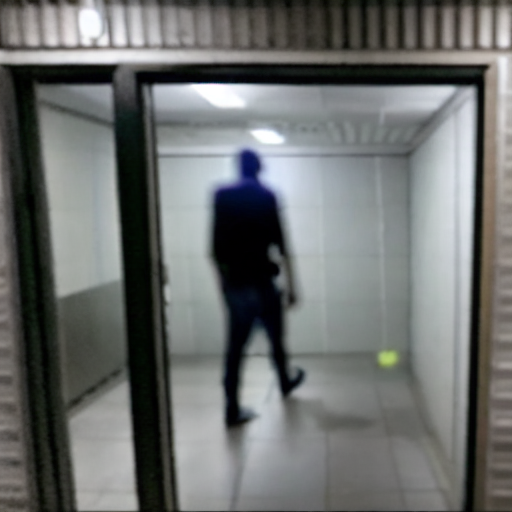

In [ ]:
from PIL import Image
Image.open('cctv.png')

In [ ]:
model('cctv.png')

[{'score': 0.9995560050010681,
  'label': 'person',
  'box': {'xmin': 207, 'ymin': 147, 'xmax': 308, 'ymax': 426}}]